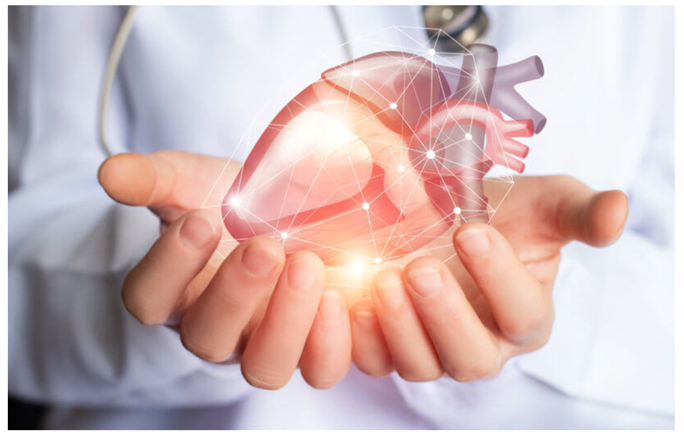

**This juyter file is based on heart disease classification using Logistic Regression, Support Vector Machine(SVM), Naive Bayes, Decision Tree, Random Forest, K-Nearest Neighbor(KNN)**

# `Importing modules`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# `Reading the dataset`

_Reading the csv file_

In [2]:
data=pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


_No. of rows and columns present_

In [3]:
data.shape

(1025, 14)

_Columns Present in the data_

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

_Summary of the data_

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


_Unique data in each column_

In [6]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

_Description of the data_

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


_Total no. of null values_

In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

_Total no. of duplicate values_

In [9]:
data.duplicated().sum()

723

# `Data Preprocessing`

### 1. Removing all duplicate values

In [10]:
data[data.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [11]:
final_df=data.drop_duplicates()

_Final data after data processing_

In [12]:
final_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


# `Train Test Split`

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=final_df.drop('target',axis=1)
y=final_df.target

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.30,random_state=20)

# `Accuracy score and f1 score`

In [16]:
from sklearn.metrics  import f1_score,accuracy_score

In [17]:
acc=pd.DataFrame({'Model':[],'Accuracy_score':[]})
acc

,Model,Accuracy_score


In [18]:
f1=pd.DataFrame({'Model':[],'f1_score':[]})
f1

,Model,f1_score


# `Model`

## 1. Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model=LogisticRegression()

In [21]:
model.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1], dtype=int64)

In [23]:
np.array(y_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1], dtype=int64)

In [24]:
print(accuracy_score(y_test,y_pred))

0.8681318681318682


In [25]:
print(f1_score(y_test,y_pred))

0.8888888888888888


In [26]:
acc.loc[1]=['Logistic Regression',accuracy_score(y_test,y_pred)]
f1.loc[1]=['Logistic Regression',f1_score(y_test,y_pred)]

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

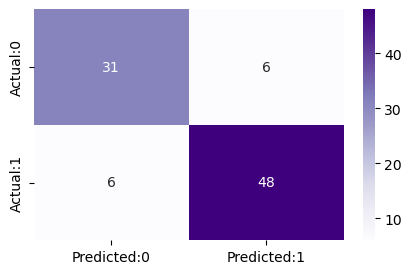

In [29]:
import seaborn as sns
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

## 2. Support Vector Machine

In [30]:
from sklearn.svm import SVC

In [31]:
model=SVC()

In [32]:
model.fit(X_train,y_train)

SVC()

In [33]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1], dtype=int64)

In [34]:
np.array(y_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1], dtype=int64)

In [35]:
print(accuracy_score(y_test,y_pred))

0.7142857142857143


In [36]:
print(f1_score(y_test,y_pred))

0.7758620689655172


In [37]:
acc.loc[2]=['SVM',accuracy_score(y_test,y_pred)]
f1.loc[2]=['SVM',f1_score(y_test,y_pred)]

In [38]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

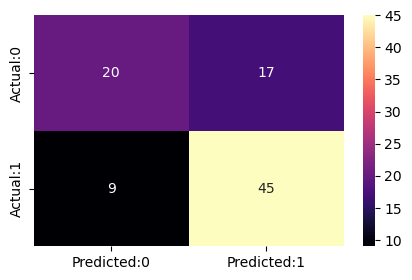

In [39]:
import seaborn as sns
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "magma")
plt.show()

## 3. Naive Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [41]:
multi=MultinomialNB()

In [42]:
multi.fit(X_train,y_train)

MultinomialNB()

In [43]:
y_pred_multi=multi.predict(X_test)
y_pred_multi

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1], dtype=int64)

In [44]:
np.array(y_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1], dtype=int64)

In [45]:
print(accuracy_score(y_test,y_pred_multi))

0.7252747252747253


In [46]:
print(f1_score(y_test,y_pred_multi))

0.7619047619047618


In [47]:
acc.loc[3]=['NB(Multinomial)',accuracy_score(y_test,y_pred_multi)]
f1.loc[3]=['NB(Multinomial)',f1_score(y_test,y_pred_multi)]

In [48]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred_multi),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

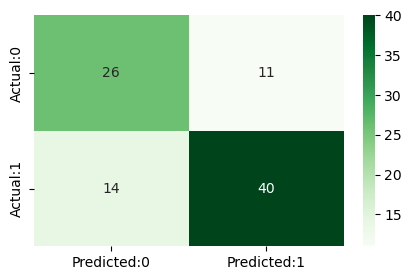

In [49]:
import seaborn as sns
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

In [50]:
gauss=GaussianNB()

In [51]:
gauss.fit(X_train,y_train)

GaussianNB()

In [52]:
y_pred_gauss=gauss.predict(X_test)
y_pred_gauss

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1], dtype=int64)

In [53]:
np.array(y_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1], dtype=int64)

In [54]:
print(accuracy_score(y_test,y_pred_gauss))

0.7802197802197802


In [55]:
print(f1_score(y_test,y_pred_gauss))

0.8113207547169811


In [56]:
acc.loc[4]=['NB(Gaussian)',accuracy_score(y_test,y_pred_gauss)]
f1.loc[4]=['NB(Gaussian)',f1_score(y_test,y_pred_gauss)]

In [57]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred_gauss),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

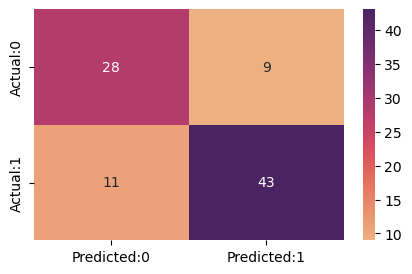

In [58]:
import seaborn as sns
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "flare")
plt.show()

## 4. Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
model=DecisionTreeClassifier()

In [61]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5168269230769231, 0.95, 'x[11] <= 0.5\ngini = 0.499\nsamples = 211\nvalue = [101, 110]'),
 Text(0.3125, 0.85, 'x[12] <= 2.5\ngini = 0.379\nsamples = 118\nvalue = [30, 88]'),
 Text(0.17307692307692307, 0.75, 'x[0] <= 57.5\ngini = 0.212\nsamples = 83\nvalue = [10, 73]'),
 Text(0.07692307692307693, 0.65, 'x[12] <= 0.5\ngini = 0.065\nsamples = 59\nvalue = [2, 57]'),
 Text(0.038461538461538464, 0.55, 'x[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.019230769230769232, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.057692307692307696, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.11538461538461539, 0.55, 'x[3] <= 109.0\ngini = 0.034\nsamples = 57\nvalue = [1, 56]'),
 Text(0.09615384615384616, 0.45, 'x[0] <= 46.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.07692307692307693, 0.35, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.11538461538461539, 0.35, 'x[6] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0961538461538461

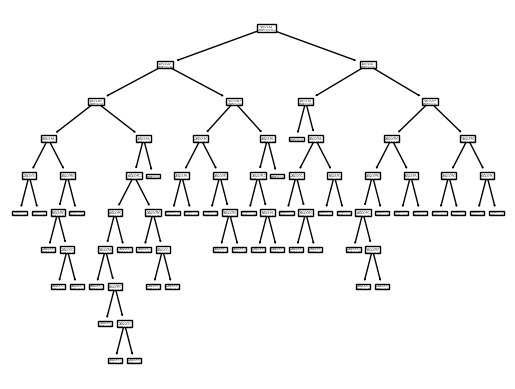

In [62]:
from sklearn import tree
tree.plot_tree(model)

In [63]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [64]:
np.array(y_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1], dtype=int64)

In [65]:
print(accuracy_score(y_test,y_pred))

0.6813186813186813


In [66]:
print(f1_score(y_test,y_pred))

0.7289719626168224


In [67]:
acc.loc[5]=['Decision Tree',accuracy_score(y_test,y_pred)]
f1.loc[5]=['Decision Tree',f1_score(y_test,y_pred)]

In [68]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

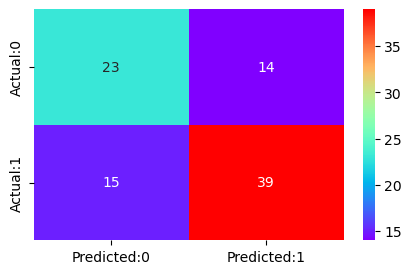

In [69]:
import seaborn as sns
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "rainbow")
plt.show()

## 5. Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
model=RandomForestClassifier()

In [72]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [73]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [74]:
np.array(y_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1], dtype=int64)

In [75]:
print(accuracy_score(y_test,y_pred))

0.7802197802197802


In [76]:
print(f1_score(y_test,y_pred))

0.8039215686274509


In [77]:
acc.loc[6]=['Random Forest',accuracy_score(y_test,y_pred)]
f1.loc[6]=['Random Forest',f1_score(y_test,y_pred)]

In [78]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

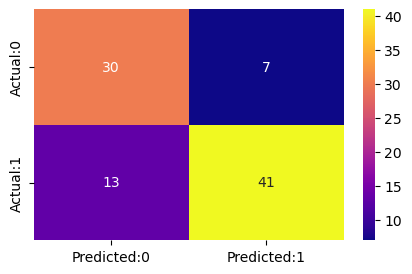

In [79]:
import seaborn as sns
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "plasma")
plt.show()

## 6. KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
model=KNeighborsClassifier()

In [82]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [83]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [84]:
np.array(y_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1], dtype=int64)

In [85]:
print(accuracy_score(y_test,y_pred))

0.6153846153846154


In [86]:
print(f1_score(y_test,y_pred))

0.631578947368421


In [87]:
acc.loc[7]=['KNN',accuracy_score(y_test,y_pred)]
f1.loc[7]=['KNN',f1_score(y_test,y_pred)]

In [88]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

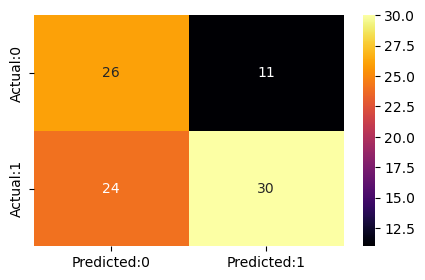

In [89]:
import seaborn as sns
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "inferno")
plt.show()

# `Conclusion`

In [90]:
acc

,Model,Accuracy_score
1,Logistic Regression,0.868132
2,SVM,0.714286
3,NB(Multinomial),0.725275
4,NB(Gaussian),0.780220
5,Decision Tree,0.681319
6,Random Forest,0.780220
7,KNN,0.615385


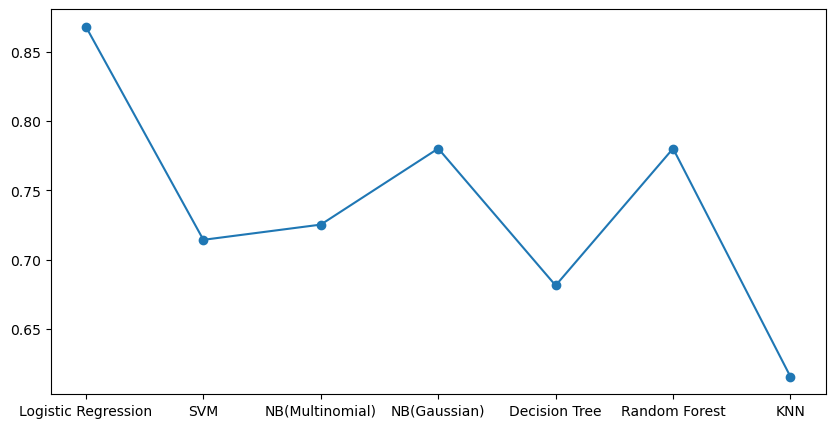

In [91]:
figure=plt.figure(figsize =(10,5)) 
plt.plot(acc.Model,acc.Accuracy_score,marker='o')

> _**As shown in the above plot, the highest accuracy is of Logistic Regression among all the models with 0.86.**_

In [92]:
f1

,Model,f1_score
1,Logistic Regression,0.888889
2,SVM,0.775862
3,NB(Multinomial),0.761905
4,NB(Gaussian),0.811321
5,Decision Tree,0.728972
6,Random Forest,0.803922
7,KNN,0.631579


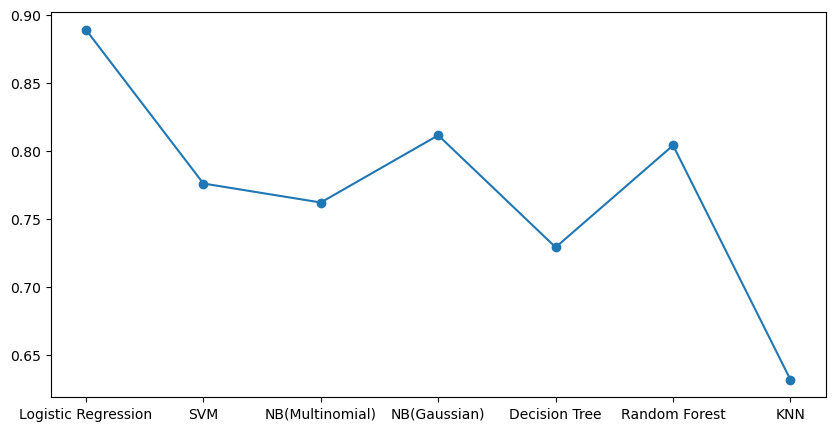

In [93]:
figure=plt.figure(figsize =(10,5)) 
plt.plot(f1.Model,f1.f1_score,marker='o')

> _**As shown in the above plot, the highest f1 score is of Logistic Regression among all the models with 0.86.**_